In [34]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
import random
import csv
import string
from datetime import datetime
import matplotlib.pyplot as plt

# Define available brands, colors, and storages
brands = ["iPhone", "Samsung", "Google Pixel", "OnePlus", "Huawei"]
colors = ["Black", "White", "Silver", "Gold", "Purple", "Blue"]
storages = ["128 gb", "256 gb", "512 gb", "1 TB", "2 TB", "4 TB"]

def generate_random_id(prefix, length=4):
    return f"{prefix}{''.join(random.choices(string.digits, k=length))}"

class Phone:
    def __init__(self, brand, color, storage):
        self.brand = brand
        self.color = color
        self.storage = storage
        self.price = round(random.uniform(400, 1200), 2)  # Random price

    def __str__(self):
        return f'Brand: {self.brand}, Color: {self.color}, Storage: {self.storage}, Price: ${self.price:.2f}'

class Order:
    def __init__(self, order_id):
        self.phones = []
        self.order_id = order_id
        num_phones = random.randint(1, 5)  # Each order can have 1 to 5 phones
        for _ in range(num_phones):
            brand = random.choice(brands)
            color = random.choice(colors)
            storage = random.choice(storages)
            phone = Phone(brand, color, storage)
            self.phones.append(phone)

    def display_order(self):
        for phone in self.phones:
            print(phone)

    def __str__(self):
        return f"Order ID: {self.order_id}, Phones: {', '.join(str(phone) for phone in self.phones)}"

class Customer:
    def __init__(self, customer_id):
        self.customer_id = customer_id
        self.orders = []

    def create_order(self, order):
        self.orders.append(order)

    def __str__(self):
        return self.customer_id

class Store:
    def __init__(self, store_id):
        self.store_id = store_id
        self.orders = []
        self.customers = []

    def add_order(self, order, customer):
        self.orders.append(order)
        if customer not in self.customers:
            self.customers.append(customer)

    def run(self):
        print(f"Welcome to Store {self.store_id}!")
        for customer in self.customers:
            print(f"Customer {customer.customer_id} is shopping.")
            order = Order(generate_random_id("Order"))
            customer.create_order(order)
            self.add_order(order, customer)
            print(order)

        self.checkout()

    def checkout(self):
        print("\nCheckout:")
        for customer in self.customers:
            print(f"{customer.customer_id}'s Orders:")
            for order in customer.orders:
                print(order)

class Corporation:
    def __init__(self, name):
        self.name = name
        self.stores = []

    def add_store(self, store):
        self.stores.append(store)

    def generate_sales_data(self, filename):
        sales_data = []
        for store in self.stores:
            for customer in store.customers:
                for order in customer.orders:
                    for phone in order.phones:
                        sales_entry = {
                            "Date": datetime.now().strftime("%Y-%m-%d"),
                            "Time": datetime.now().strftime("%H:%M:%S"),
                            "StoreID": store.store_id,
                            "CustomerID": customer.customer_id,
                            "OrderID": order.order_id,
                            "Product Name": phone.brand,
                            "Price": phone.price
                        }
                        sales_data.append(sales_entry)

        with open(filename, 'w', newline='') as csvfile:
            fieldnames = ["Date", "Time", "StoreID", "CustomerID", "OrderID", "Product Name", "Price"]
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            for entry in sales_data:
                writer.writerow(entry)

if __name__ == "__main__":
    tech_corp = Corporation("TechCorp")

    for _ in range(5):
        store_id = generate_random_id("", 4)  # No prefix for store ID
        store = Store(store_id)
        tech_corp.add_store(store)

    for _ in range(15):
        customer_id = generate_random_id("", 4)  # No prefix for customer ID
        customer = Customer(customer_id)
        store = random.choice(tech_corp.stores)
        store.customers.append(customer)

    for store in tech_corp.stores:
        store.run()

    tech_corp.generate_sales_data("tech_sales_data.csv")


Welcome to Store 7317!
Customer 6982 is shopping.
Order ID: Order7436, Phones: Brand: Huawei, Color: Silver, Storage: 1 TB, Price: $940.61
Customer 8771 is shopping.
Order ID: Order6764, Phones: Brand: OnePlus, Color: Blue, Storage: 1 TB, Price: $700.49, Brand: Samsung, Color: Silver, Storage: 512 gb, Price: $1023.54, Brand: Samsung, Color: Blue, Storage: 4 TB, Price: $700.34, Brand: Huawei, Color: White, Storage: 4 TB, Price: $774.80, Brand: Google Pixel, Color: White, Storage: 512 gb, Price: $829.10
Customer 7428 is shopping.
Order ID: Order9439, Phones: Brand: OnePlus, Color: Gold, Storage: 1 TB, Price: $495.13, Brand: OnePlus, Color: Purple, Storage: 2 TB, Price: $448.87
Customer 4642 is shopping.
Order ID: Order7049, Phones: Brand: Samsung, Color: White, Storage: 2 TB, Price: $1004.65, Brand: iPhone, Color: White, Storage: 512 gb, Price: $551.44
Customer 7071 is shopping.
Order ID: Order5280, Phones: Brand: iPhone, Color: Gold, Storage: 128 gb, Price: $1165.81, Brand: iPhone, Colo

Most prevalent products in customer baskets:
Product Name
OnePlus         12
Samsung         11
Huawei           7
iPhone           6
Google Pixel     3
Name: count, dtype: int64
Frequency of large basket customers:
CustomerID
8771    5
4314    5
8206    5
6794    4
2043    4
Name: count, dtype: int64
Stores with large-basket buyers and average basket size:
StoreID
1647    3311.070000
3100    3187.926667
4919    3238.340000
7317    3337.532000
Name: Total Price, dtype: float64


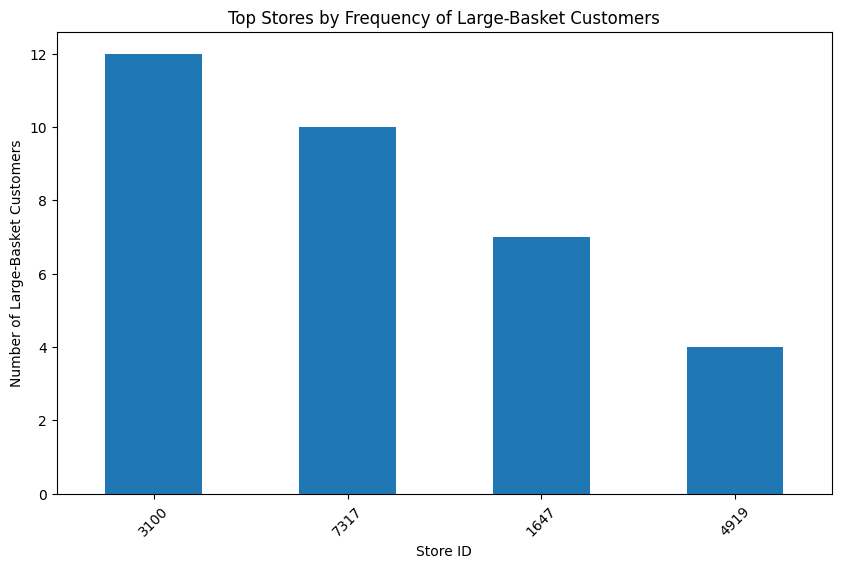

Top-n products for large-basket customers:
Product Name
Samsung         11
OnePlus          8
Huawei           6
iPhone           5
Google Pixel     3
Name: count, dtype: int64
Categorical makeup of large-basket customers' baskets:
Product Name
Samsung         11
OnePlus          8
Huawei           6
iPhone           5
Google Pixel     3
dtype: int64


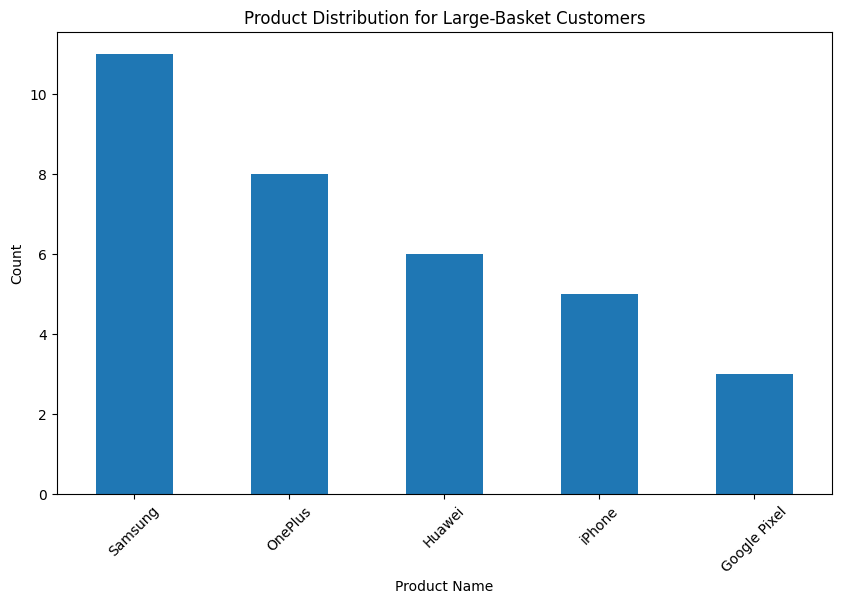

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sales data from the CSV file
df = pd.read_csv("tech_sales_data.csv")

# 1. Most prevalent products in customer baskets
product_counts = df['Product Name'].value_counts()
print("Most prevalent products in customer baskets:")
print(product_counts.head())

# 2. Frequency by which customers were large buyers (large baskets)
# Define a large basket as one with a total price above a certain threshold (e.g., $1000)
df['Total Price'] = df.groupby('OrderID')['Price'].transform('sum')
large_basket_customers = df[df['Total Price'] > 1000]

# Count the number of large-basket orders per customer
large_basket_customer_counts = large_basket_customers['CustomerID'].value_counts()
print("Frequency of large basket customers:")
print(large_basket_customer_counts.head())

# 3. Stores containing large-basket buyers and by how much
large_basket_customers_by_store = large_basket_customers.groupby('StoreID')['Total Price'].mean()
print("Stores with large-basket buyers and average basket size:")
print(large_basket_customers_by_store)

# 4. Visualization: Rank top stores by frequency of large-basket buyers
store_large_basket_counts = large_basket_customers.groupby('StoreID').size()
store_large_basket_counts = store_large_basket_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
store_large_basket_counts.plot(kind='bar')
plt.title('Top Stores by Frequency of Large-Basket Customers')
plt.xlabel('Store ID')
plt.ylabel('Number of Large-Basket Customers')
plt.xticks(rotation=45)
plt.show()

# 5. Top-n list of products for large-basket customers
top_products_large_basket = large_basket_customers['Product Name'].value_counts().head(10)
print("Top-n products for large-basket customers:")
print(top_products_large_basket)

# 6. Categorical makeup of large-basket customers' baskets (e.g., brand, storage, color)
# Get the categorical breakdown of large-basket orders
categorical_breakdown = large_basket_customers[['Product Name', 'StoreID']].groupby(['Product Name']).size().sort_values(ascending=False)
print("Categorical makeup of large-basket customers' baskets:")
print(categorical_breakdown)

# Visualization: Distribution of product types (brands, etc.) in large-basket customers' baskets
category_counts = large_basket_customers['Product Name'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Product Distribution for Large-Basket Customers')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules


In [39]:
# Load the sales data from the CSV file
df = pd.read_csv("tech_sales_data.csv")

In [40]:
# 1. Data preparation: Create a "basket" for each customer order
# Group by order and store product counts for each customer order
basket = df.groupby(['OrderID', 'Product Name'])['Price'].sum().unstack(fill_value=0)

In [41]:
# Convert the price into binary format: 1 if product was bought, 0 if not
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\Connor\AppData\Local\Temp\ipykernel_6576\853274639.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [42]:
# Display the transformed basket data (this is the "transaction matrix")
print(basket.head())

Product Name  Google Pixel  Huawei  OnePlus  Samsung  iPhone
OrderID                                                     
Order0037                0       1        1        1       0
Order0230                0       1        0        1       0
Order1439                0       1        1        1       1
Order1813                1       0        1        0       0
Order2621                0       0        1        0       1


In [43]:
# 2. Market Basket Analysis using the Apriori Algorithm
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

c:\Users\Connor\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [44]:
# Display frequent itemsets
print(frequent_itemsets.head())

    support        itemsets
0  0.200000  (Google Pixel)
1  0.333333        (Huawei)
2  0.600000       (OnePlus)
3  0.466667       (Samsung)
4  0.333333        (iPhone)


In [45]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Data preparation: Create a "basket" for each customer order
# Group by OrderID and Product Name, then sum the prices for each product in an order
basket = df.groupby(['OrderID', 'Product Name'])['Price'].sum().unstack(fill_value=0)

# Convert the price into binary format: 1 if product was bought, 0 if not
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Check for any NaN values and fill them with 0 (just in case)
basket = basket.fillna(0)

# Display the transformed basket data (this is the "transaction matrix")
print(basket.head())

# 2. Market Basket Analysis using the Apriori Algorithm
# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.05
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets.head())

# 3. Generate Association Rules from Frequent Itemsets
# Provide num_itemsets to avoid the error. Let's assume we want rules for itemsets with a max of 3 items.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=3)

# Display the top 10 association rules
print(rules.head(10))


Product Name  Google Pixel  Huawei  OnePlus  Samsung  iPhone
OrderID                                                     
Order0037                0       1        1        1       0
Order0230                0       1        0        1       0
Order1439                0       1        1        1       1
Order1813                1       0        1        0       0
Order2621                0       0        1        0       1
    support        itemsets
0  0.200000  (Google Pixel)
1  0.333333        (Huawei)
2  0.600000       (OnePlus)
3  0.466667       (Samsung)
4  0.333333        (iPhone)
      antecedents     consequents  antecedent support  consequent support  \
0  (Google Pixel)        (Huawei)            0.200000            0.333333   
1        (Huawei)  (Google Pixel)            0.333333            0.200000   
2  (Google Pixel)       (OnePlus)            0.200000            0.600000   
3       (OnePlus)  (Google Pixel)            0.600000            0.200000   
4       (OnePlus)   

C:\Users\Connor\AppData\Local\Temp\ipykernel_6576\4269334884.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
c:\Users\Connor\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [46]:
# 4. Best-selling items for each store
# Aggregate the sales data to find top-selling items per store
store_sales = df.groupby(['StoreID', 'Product Name'])['Price'].sum().reset_index()

In [47]:
# Get the top-selling products by store
top_selling_items_per_store = store_sales.groupby('StoreID').apply(lambda x: x.nlargest(3, 'Price'))

C:\Users\Connor\AppData\Local\Temp\ipykernel_6576\1473203707.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_selling_items_per_store = store_sales.groupby('StoreID').apply(lambda x: x.nlargest(3, 'Price'))


In [48]:
# Display the top-selling items per store
print("Top-selling products per store:")
print(top_selling_items_per_store)

Top-selling products per store:
            StoreID Product Name    Price
StoreID                                  
1647    2      1647      Samsung  2410.59
        1      1647      OnePlus  2148.71
        3      1647       iPhone  1353.78
3100    5      3100       Huawei  3389.43
        7      3100      Samsung  3166.22
        6      3100      OnePlus  2549.51
4919    8      4919      OnePlus  3035.37
        9      4919       iPhone  1138.10
7317    13     7317      Samsung  3876.98
        14     7317       iPhone  2776.92
        11     7317       Huawei  1715.41


In [49]:
# 5. Best-selling items across the entire corporation
total_sales = df.groupby('Product Name')['Price'].sum().reset_index()
top_selling_items_corporation = total_sales.nlargest(5, 'Price')

In [50]:
# Display the best-selling items across the corporation
print("Best-selling products across the corporation:")
print(top_selling_items_corporation)

Best-selling products across the corporation:
   Product Name    Price
3       Samsung  9453.79
2       OnePlus  9378.08
1        Huawei  5641.96
4        iPhone  5268.80
0  Google Pixel  2357.30


<Figure size 1000x600 with 0 Axes>

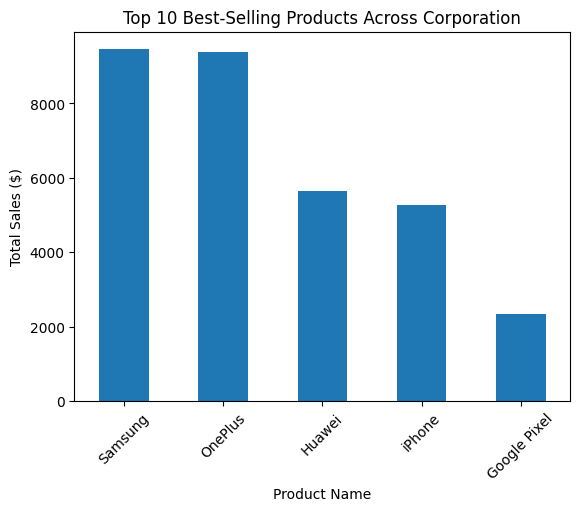

In [51]:
# 6. Visualization: Plotting the best-selling items
plt.figure(figsize=(10, 6))
total_sales.nlargest(10, 'Price').plot(kind='bar', x='Product Name', y='Price', legend=False)
plt.title('Top 10 Best-Selling Products Across Corporation')
plt.xlabel('Product Name')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

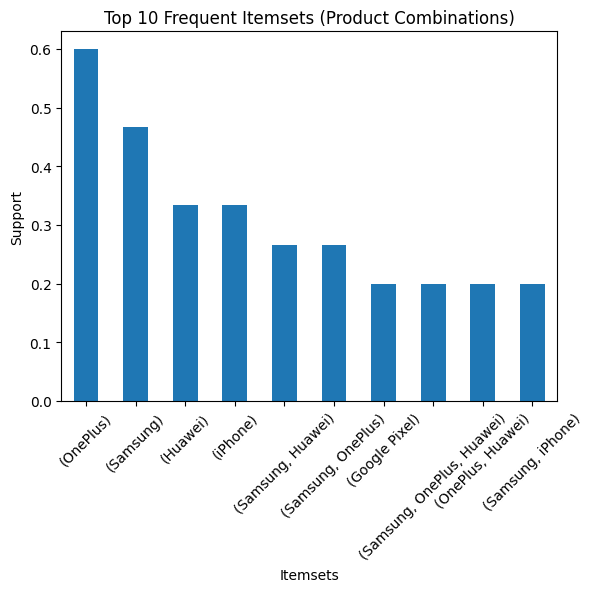

In [52]:
# Visualization of the most frequent itemsets
plt.figure(figsize=(10, 6))
frequent_itemsets.sort_values('support', ascending=False).head(10).plot(kind='bar', x='itemsets', y='support', legend=False)
plt.title('Top 10 Frequent Itemsets (Product Combinations)')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.show()